# <b>Statistika </b>
### <b>Study case Hubungan IPK dengan gaji awal dan waktu dapat kerja</b>
kelompok 8 :
- Muhamad Arifin Noval
- Muhamad Khoiri Tahmid
- Raihan Firdaus


### <b>Data awal</b>
kami menggunakan data palsu, yaitu data yang dibuat dengan cara randomization menggunakan numpy lalu dijadikan dataframe pandas<br>
datanya terdiri dari 100 baris dan 4 kolom (nama, IPK, gaji pertama, waktu untuk dapat kerja)<br>
lalu, akan dibuat file excel dari data tersebut <b>jika file tersebut belum ada</b>


In [37]:
# import library yang dibutuhkan
import os.path
import numpy as np
import pandas as pd
import names            # untuk mendapat nama dengan acak

# membuat array berisi 100 data IPK
a = np.random.uniform(2,4,size=(100))
b = np.random.uniform(0,13,size=(100))
ipk=[]
waktu_dapat_kerja = []
for k in a :
    ipk.append(round(k + 0, 2))

for l in b :
    waktu_dapat_kerja.append(round(l + 0, 1))


# membuat array berisi 100 data waktu mendapatkan pekerjaan
#waktu_dapat_kerja = np.random.choice(['sebelum', 'kurang dari 4 bulan', 'antara 4 - 8 bulan', 'antara 8 - 12 bulan', 'lebih dari setahun'], size=(100))


# membuat array berisi 100 data gaji awal dengan rentang 800 ribu - 10 juta
gaji_awal = np.random.randint(800000,10000000,size=(100))

# membuat array berisi 100 nama 
array_nama=[]
for _ in range(100):
    array_nama.append(names.get_full_name())
nama=np.array(array_nama)

# menyatukan data dalam dataframe pandas
dataframe = pd.DataFrame({'nama':nama, 'IPK':ipk, 'waktu_dapat_kerja':waktu_dapat_kerja, 'gaji_awal':gaji_awal})

# buat file excel jika file tersebut belum ada
if not(os.path.exists("/workspaces/codespaces-jupyter/notebooks/data.xlsx")):
    dataframe.to_excel('data.xlsx', index=False)
    



### <b> Mengambil data dari file data.xlsx

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# baca file sumber data
data = pd.DataFrame(pd.read_excel("data.xlsx"))

#print data hasil bacaan
data

,nama,IPK,waktu_dapat_kerja,gaji_awal
0,Linda Landon,2.49,6.8,7132185
1,Patricia Gerber,3.09,2.7,3282202
2,Jessica Vang,2.42,1.8,8496726
3,Albert Gamble,3.11,0.3,4383561
4,Shawna Dickey,3.10,1.5,8169324
...,...,...,...,...
95,Richard Flatter,2.04,12.0,9255826
96,Jennifer Mason,2.69,9.5,9098768
97,Lai Schweinsberg,2.25,11.0,8091077
98,Clara Heyward,3.19,7.4,8903169


### <b>Grafik hubungan IPK dengan gaji awal

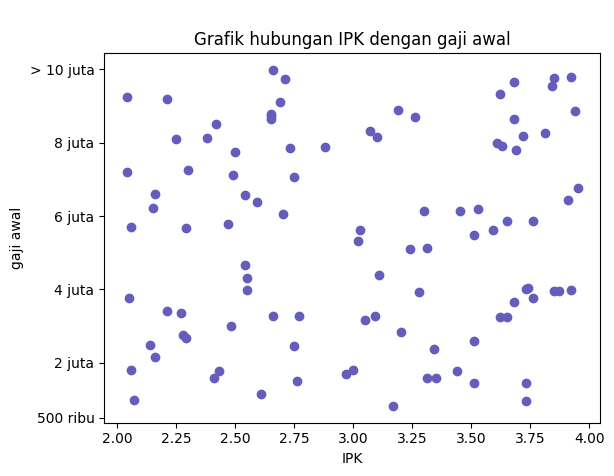

In [39]:
import matplotlib.pyplot as plt


ax = plt.axes()

ax.scatter(data['IPK'], data['gaji_awal'],color = "#655DBB")

#configuration of plot
ax.set_title("\nGrafik hubungan IPK dengan gaji awal")
ax.set_ylabel('gaji awal')
ax.set_xlabel('IPK')

ax.set_yticks((500000,2000000,4000000,6000000,8000000,10000000))
ax.set_yticklabels(("500 ribu","2 juta","4 juta","6 juta","8 juta","> 10 juta"))


#display
plt.show()

### <b>Grafik hubungan <i>kelompok IPK</i> dengan gaji awal

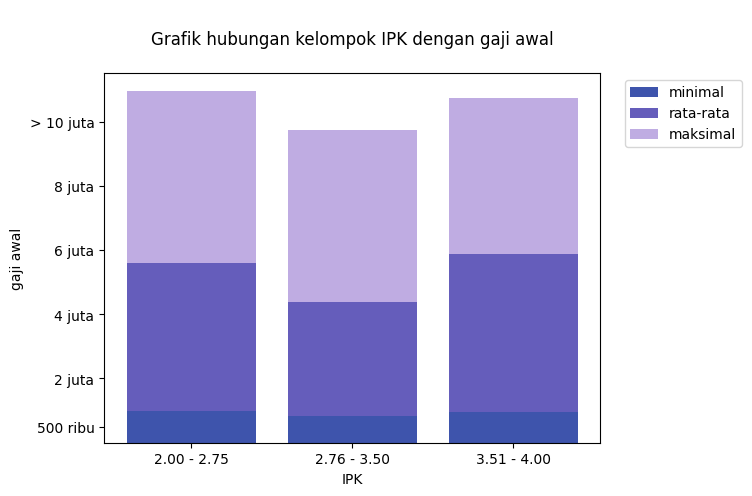

In [40]:
import matplotlib.pyplot as plt


IPK_sedang = data.loc[ data["IPK"] <= 2.75 ]
IPK_bagus = data.loc[ (data["IPK"] >= 2.76) & (data["IPK"] <= 3.50) ]
IPK_sangat_bagus = data.loc[ (data["IPK"] >= 3.51) & (data["IPK"] <= 4.00) ]

min_gaji=np.array([IPK_sedang["gaji_awal"].min(), IPK_bagus["gaji_awal"].min(), IPK_sangat_bagus["gaji_awal"].min()])
mean_gaji=np.array([IPK_sedang["gaji_awal"].mean(), IPK_bagus["gaji_awal"].mean(), IPK_sangat_bagus["gaji_awal"].mean()])
max_gaji=np.array([IPK_sedang["gaji_awal"].max(), IPK_bagus["gaji_awal"].max(), IPK_sangat_bagus["gaji_awal"].max()])

dummy=mean_gaji-min_gaji

ax = plt.axes()
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],min_gaji, color = "#3E54AC" )
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],dummy, bottom = min_gaji, color = "#655DBB"  )
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],(max_gaji-dummy), bottom = np.add(min_gaji,dummy) , color = "#BFACE2")

ax.set_yticks((500000,2000000,4000000,6000000,8000000,10000000))
ax.set_yticklabels(("500 ribu","2 juta","4 juta","6 juta","8 juta","> 10 juta"))

plt.legend(["minimal", "rata-rata", "maksimal"], loc ="upper right",bbox_to_anchor=(1.3,1))

ax.set_title("\nGrafik hubungan kelompok IPK dengan gaji awal\n")
ax.set_ylabel('gaji awal')
ax.set_xlabel('IPK')


plt.show()


### <b>hubungan IPK dengan waktu dapat kerja</b>

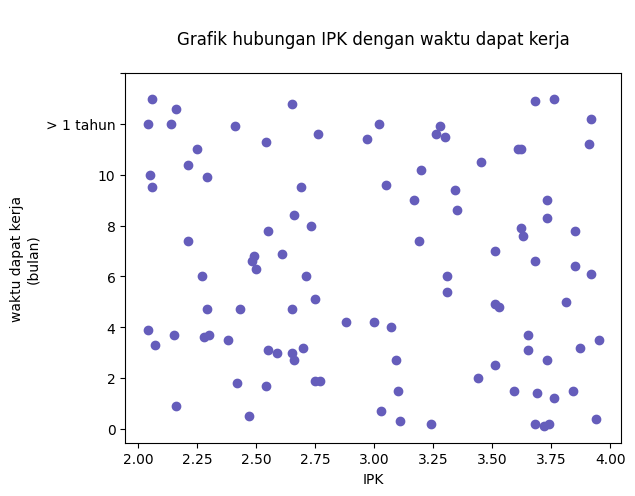

In [41]:
import matplotlib.pyplot as plt


ax = plt.axes()

ax.scatter(data['IPK'], data['waktu_dapat_kerja'], color = "#655DBB")

#configuration of plot
ax.set_title("\nGrafik hubungan IPK dengan waktu dapat kerja\n")
ax.set_ylabel('waktu dapat kerja\n(bulan)')
ax.set_xlabel('IPK')

ax.set_yticks((0,2,4,6,8,10,12,14))
ax.set_yticklabels((0,2,4,6,8,10,"> 1 tahun",""))


#display
plt.show()

#### <b>grafik hubungan kelompok IPK dengan waktu dapat kerja

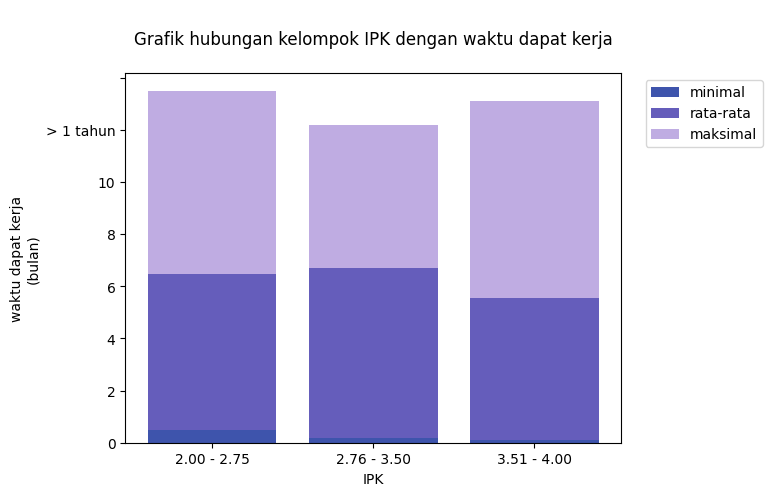

In [42]:
import matplotlib.pyplot as plt


IPK_sedang = data.loc[ data["IPK"] <= 2.75 ]
IPK_bagus = data.loc[ (data["IPK"] >= 2.76) & (data["IPK"] <= 3.50) ]
IPK_sangat_bagus = data.loc[ (data["IPK"] >= 3.51) & (data["IPK"] <= 4.00) ]

min_waktu=np.array([IPK_sedang['waktu_dapat_kerja'].min(), IPK_bagus['waktu_dapat_kerja'].min(), IPK_sangat_bagus['waktu_dapat_kerja'].min()])
mean_waktu=np.array([IPK_sedang['waktu_dapat_kerja'].mean(), IPK_bagus['waktu_dapat_kerja'].mean(), IPK_sangat_bagus['waktu_dapat_kerja'].mean()])
max_waktu=np.array([IPK_sedang['waktu_dapat_kerja'].max(), IPK_bagus['waktu_dapat_kerja'].max(), IPK_sangat_bagus['waktu_dapat_kerja'].max()])

dummy=mean_waktu-min_waktu

ax = plt.axes()
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],min_waktu, color = "#3E54AC" )
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],dummy, bottom = min_waktu, color = "#655DBB"  )
ax.bar(["2.00 - 2.75", "2.76 - 3.50", "3.51 - 4.00"],(max_waktu-dummy), bottom = np.add(min_waktu,dummy) , color = "#BFACE2")


ax.set_yticks((0,2,4,6,8,10,12,14))
ax.set_yticklabels((0,2,4,6,8,10,"> 1 tahun",""))

ax.set_title("\nGrafik hubungan kelompok IPK dengan waktu dapat kerja\n")
ax.set_ylabel('waktu dapat kerja\n(bulan)')
ax.set_xlabel('IPK')

plt.legend(["minimal", "rata-rata", "maksimal"], loc ="upper right",bbox_to_anchor=(1.3,1))

plt.show()


#### <b>Grafik hubungan IPK dengan gaji awal dan waktu dapat kerja

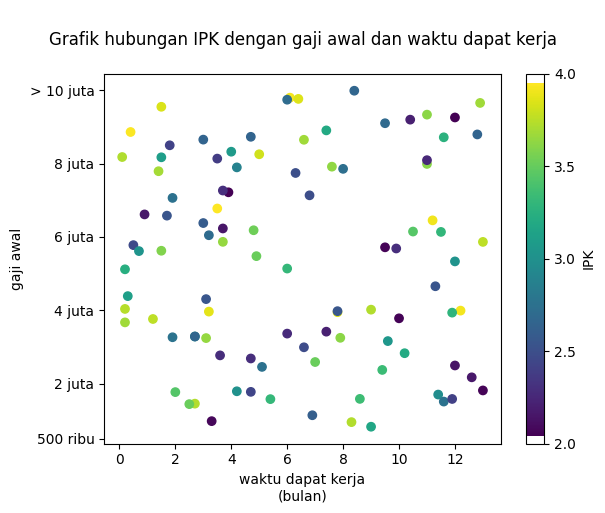

In [43]:
import matplotlib.pyplot as plt


ax = plt.axes()

plt.scatter(data['waktu_dapat_kerja'], data['gaji_awal'],c=data["IPK"])

#configuration of plot
ax.set_title("\nGrafik hubungan IPK dengan gaji awal dan waktu dapat kerja\n")
ax.set_ylabel('gaji awal')
ax.set_xlabel('waktu dapat kerja\n(bulan)')

ax.set_yticks((500000,2000000,4000000,6000000,8000000,10000000))
ax.set_yticklabels(("500 ribu","2 juta","4 juta","6 juta","8 juta","> 10 juta"))

plt.colorbar(label='IPK').set_ticks([2.00,2.50,3.00,3.50,4.00])
#display
plt.show()